<a href="https://colab.research.google.com/github/namnitha/Dissertation/blob/master/11-08/BCI_dataanalysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mne

In [ ]:
pip install neo

In [ ]:
pip install BCI2kReader

In [ ]:
import neo
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from BCI2kReader import BCI2kReader as b2k

In [ ]:
data = b2k.BCI2kReader('/content/VPtaqS001R01.dat')


In [ ]:
signals = data.signals
print(signals.shape)

(68, 96260)


In [ ]:
#sampling rate
data.samplingrate

500.0

In [ ]:
#reads the whole file and stores it in a numpy matrix channels
my_signals = data.signals

#reads all states as a dictionary
my_states= data.states
my_states['Running']

array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32)

In [ ]:
print(my_states)

{'StimulusCodeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusTypeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SourceTime': array([[ 5509,  5509,  5509, ..., 11077, 11077, 11077]], dtype=int32), 'Running': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'Recording': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'StimulusCode': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusType': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'Flashing': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SelectedTarget': array([[5, 5, 5, ..., 6, 6, 6]], dtype=int32), 'SelectedRow': array([[1, 1, 1, ..., 2, 2, 2]], dtype=int32), 'SelectedColumn': array([[5, 5, 5, ..., 1, 1, 1]], dtype=int32), 'PhaseInSequence': array([[2, 2, 2, ..., 3, 3, 3]], dtype=int32), 'StimulusTime': array([[ 5478,  5478,  5478, ..., 11046, 11046, 11046]], dtype=int32)}


Stimulus Code =  [[0 0 0 ... 0 0 0]]


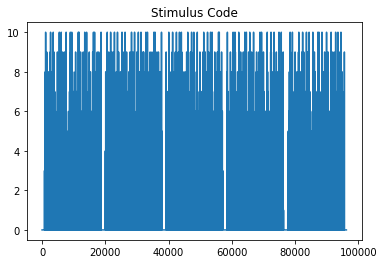

Stimulus Type =  [[0 0 0 ... 0 0 0]]


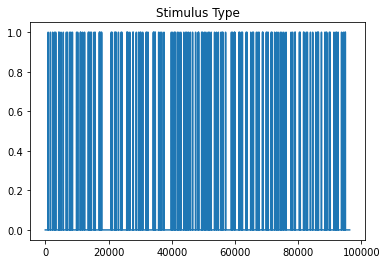

Stimulus Time =  [[ 5478  5478  5478 ... 11046 11046 11046]]


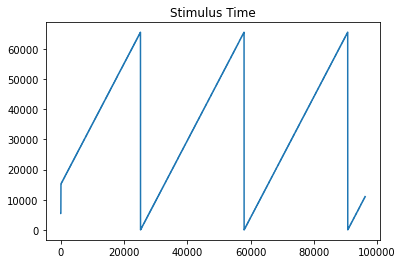

Source Time =  [[ 5509  5509  5509 ... 11077 11077 11077]]


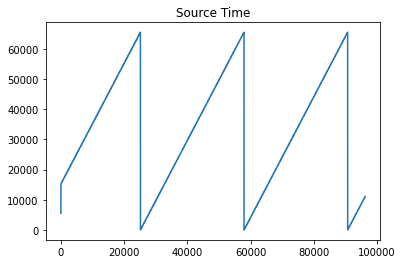

In [ ]:
print('Stimulus Code = ', my_states['StimulusCode'])
plt.title('Stimulus Code')
plt.plot(my_states['StimulusCode'][0])
plt.show()

print('Stimulus Type = ', my_states['StimulusType'])
plt.title('Stimulus Type')
plt.plot(my_states['StimulusType'][0])
plt.show()

print('Stimulus Time = ', my_states['StimulusTime'])
plt.title('Stimulus Time')
plt.plot(my_states['StimulusTime'][0])
plt.show()

#Stimulus time and Source time are different
print('Source Time = ', my_states['SourceTime'])
plt.title('Source Time')
plt.plot(my_states['SourceTime'][0])
plt.show()

In [ ]:
#creating MNE datastructures
#Creating Raw objects and info

info = mne.create_info(
    ch_names=['FP1', 'Fpz', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FT7', 
          'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 
          'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 
          'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 
          'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 
          'PO7', 'P05', 'P01', 'POz', 'P02', 'P06', 'PO8', 'O1', 'Oz', 'O2', 
          'O9', 'Iz', 'O10', 'NA', 'NA', 'NA', 'NA', 'NA'],
    ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog', 'eog', 'eog'],
    sfreq=100)
print(info)
raw = mne.io.RawArray(my_signals, info)
print(raw)

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, Fpz, FP2, F7, F3, Fz, F4, F8, FT9, FT7, FC5, FC3, FC1, FCz, ...
 chs: 63 EEG, 5 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 100.0 Hz
>
Creating RawArray with float64 data, n_channels=68, n_times=96260
    Range : 0 ... 96259 =      0.000 ...   962.590 secs
Ready.
<RawArray | 68 x 96260 (962.6 s), ~50.1 MB, data loaded>


<ipython-input-14-0860ec85aee9>:19: RuntimeWarning: Channel names are not unique, found duplicates for: {'NA'}. Applying running numbers for duplicates.
  sfreq=100)


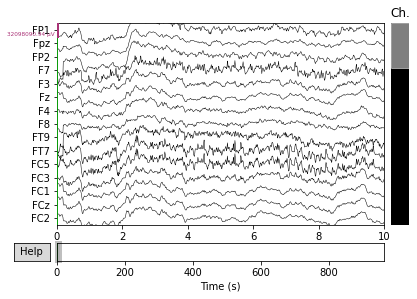

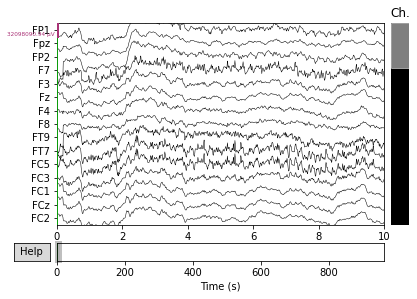

In [ ]:
raw.plot(n_channels=15, title='Data from arrays', scalings='auto', 
                show=True, block=True)

The event list contains three columns. The first column corresponds to sample number. To convert this to seconds, you should divide the sample number by the used sampling frequency. The second column is reserved for the old value of the trigger channel at the time of transition, but is currently not in use. The third column is the trigger id (amplitude of the pulse).

##Taking events from Stimulus code and Stimulus type

In [ ]:
st = my_states['StimulusType'][0]
sc = my_states['StimulusCode'][0]
LS = 0  #last state
isFirst = True
#---------------------------Attended-------------------------
#Targets
for i in range(len(st)):    
    if(LS != st[i] and st[i] == 1):
        #print('state change detected')
        if isFirst:
            events = np.array([i, 0, 1])
            isFirst = False
        else:
            events = np.vstack((events, np.array([i, 0, 1])))
    LS = st[i] 
#print(events)
print('Found %s events, first five:' % len(events))
print(events[:10])

#---------------------------Non attended-------------------------
#StimulusType and code
LS = 0  #last state

for i in range(len(sc)):  
    if(LS != sc[i] and sc[i] != 0 and st[i] == 0):
      events = np.vstack((events, np.array([i, 0, 2])))
    LS = sc[i]
    
#print(events)
print('Found %s events, first five:' % len(events))
print(events[:-10])

Found 150 events, first five:
[[ 860    0    1]
 [1580    0    1]
 [2300    0    1]
 [2900    0    1]
 [3260    0    1]
 [4220    0    1]
 [4340    0    1]
 [4940    0    1]
 [5660    0    1]
 [6620    0    1]]
Found 750 events, first five:
[[  860     0     1]
 [ 1580     0     1]
 [ 2300     0     1]
 ...
 [93780     0     2]
 [93900     0     2]
 [94020     0     2]]


In [ ]:
print('Found %s events' % len(events1))
print('All Events', events1)

plt.title('Events extracted from Stimulus Type and Stimulus Code')
plt.plot(events1)

750 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 750 events and 100 original time points ...


<ipython-input-104-20a8426164f3>:8: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  tmax=tmax, baseline=None, verbose=True)


0 bad epochs dropped
Loading data for 750 events and 100 original time points ...
Loading data for 20 events and 100 original time points ...


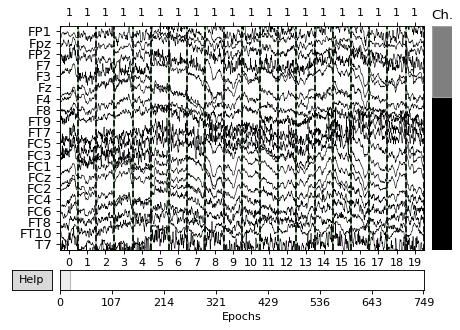

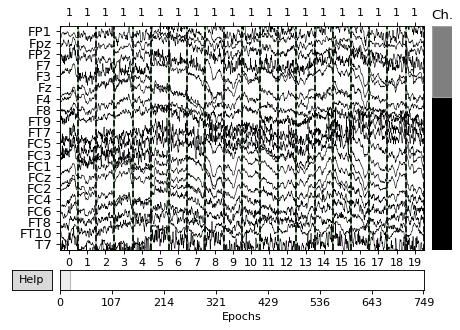

In [ ]:
# for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

#Creating Epochs
from mne import Epochs
epochs = Epochs(raw, events=events, event_id= None, tmin=tmin, 
                    tmax=tmax, baseline=None, verbose=True)

#Plotting Epochs
epochs.plot(scalings='auto', show=True, block=True)

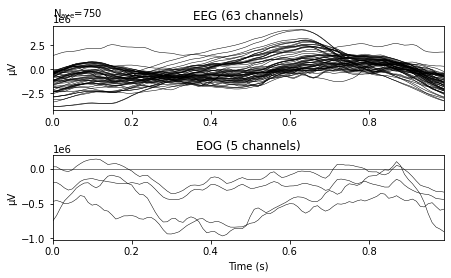

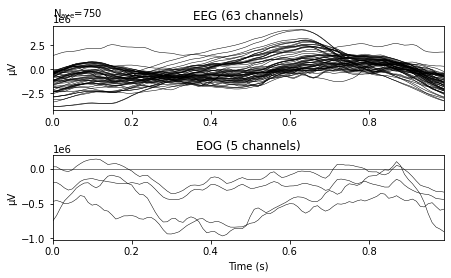

In [ ]:
# averaging the epochs to get the evoked response
picks1 = mne.pick_types(epochs.info, eeg=True, eog=True)
evoked = epochs.average(picks=picks1)
evoked.plot(time_unit='s')

Need more than one channel to make topography for eeg. Disabling interactivity.


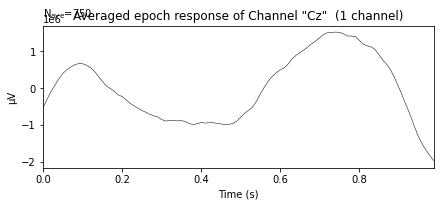

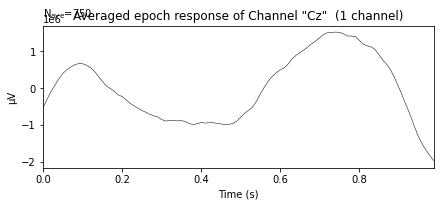

In [ ]:
# Averaging the epochs for selected channels
picks = [raw.ch_names.index(ch) for ch in ['Cz']] 
evoked = epochs.average(picks=picks)

title = 'Averaged epoch response of Channel "Cz" '
evoked.plot(titles=dict(eeg=title), time_unit='s')

##Classifying the epochs

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from mne.preprocessing import Xdawn
from mne.decoding import Vectorizer

In [ ]:
# Create classification pipeline
n_filter = 3

event_id = {'Attended': 1, 'Non-Attended': 2}

clf = make_pipeline(Xdawn(),
                    Vectorizer(),
                    MinMaxScaler(),
                    LogisticRegression(penalty='l1', solver='liblinear',
                                       multi_class='auto'))

# Get the labels and epochs
labels = epochs.events[:, -1]
epochsdata = epochs.get_data()

# Cross validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Do cross-validation
preds = np.empty(len(labels))
for train, test in cv.split(epochs, labels):
    y_train, y_test = labels[train], labels[test]

    clf.fit(epochs[train], y_train)
    preds[test] = clf.predict(epochs[test])

# Classification report
target_names = ['attended', 'non-attended']
report = classification_report(labels, preds, target_names=target_names)
print(report)

# Normalized confusion matrix
cm = confusion_matrix(labels, preds)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]


Loading data for 750 events and 100 original time points ...
Loading data for 675 events and 100 original time points ...
Computing rank from data with rank='full'
    EEG: rank 63 from info
Reducing data rank from 63 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 63 from info
Reducing data rank from 63 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 63 from info
Reducing data rank from 63 -> 63
Estimating covariance using EMPIRICAL
Done.
Loading data for 675 events and 100 original time points ...


ValueError: ignored

In [ ]:
train.shape

(675,)

In [ ]:
test.shape

(75,)

In [ ]:
labels[test].shape

(75,)

In [ ]:
epochs[train].shape

AttributeError: ignored

In [ ]:
print(epochs[1:5])

<Epochs  |   4 events (all good), 0 - 0.99 sec, baseline off, ~134 kB, data not loaded,
 '1': 4>


In [ ]:
# Plot confusion matrix
fig, ax = plt.subplots(1)
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(title='Normalized Confusion matrix')
fig.colorbar(im)
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
fig.tight_layout()
ax.set(ylabel='True label', xlabel='Predicted label')